# Data Mining Project


### Data Pre-processing and Exploratory Data Analysis

## Exploratory Data Analysis (EDA)

---



---



---



---



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy as copy
%matplotlib inline

### Reading the Data

In [7]:
from google.colab import files

uploaded = files.upload()

Saving adult.csv to adult.csv


In [8]:
df = pd.read_csv('adult.csv')

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### View summary of dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [13]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df.shape

(32561, 15)

### Preprocessing of the data

In [15]:
df.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [16]:
# Missing Values:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [17]:
#Missing Values are represented as Question Marks in this Dataset.
print("No of Missing Values in each categorical column ")
print(f"workclass : {sum(df['workclass']=='?')}")
print(f"education : {sum(df['education']=='?')}")
print(f"marital.status : {sum(df['marital.status']=='?')}")
print(f"occupation : {sum(df['occupation']=='?')}")
print(f"relationship : {sum(df['relationship']=='?')}")
print(f"race : {sum(df['race']=='?')}")
print(f"sex : {sum(df['sex']=='?')}")
print(f"native.country : {sum(df['native.country']=='?')}")
print(f"income : {sum(df['income']=='?')}")

No of Missing Values in each categorical column 
workclass : 1836
education : 0
marital.status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native.country : 583
income : 0


In [18]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [20]:
#Removing Missing Values:
df1 = df[(df['workclass']!='?')&(df['occupation']!='?')&(df['native.country']!='?')].copy(deep = True)
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [21]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [22]:
df1["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [23]:
df1.shape

(30162, 15)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [26]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain',
                    'capital.loss','hours.per.week']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation',
                'relationship', 'race', 'sex', 'native.country', 'income']

In [27]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [28]:
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [29]:
df1["income"].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

### Data Visualization

In [30]:
import seaborn as sns

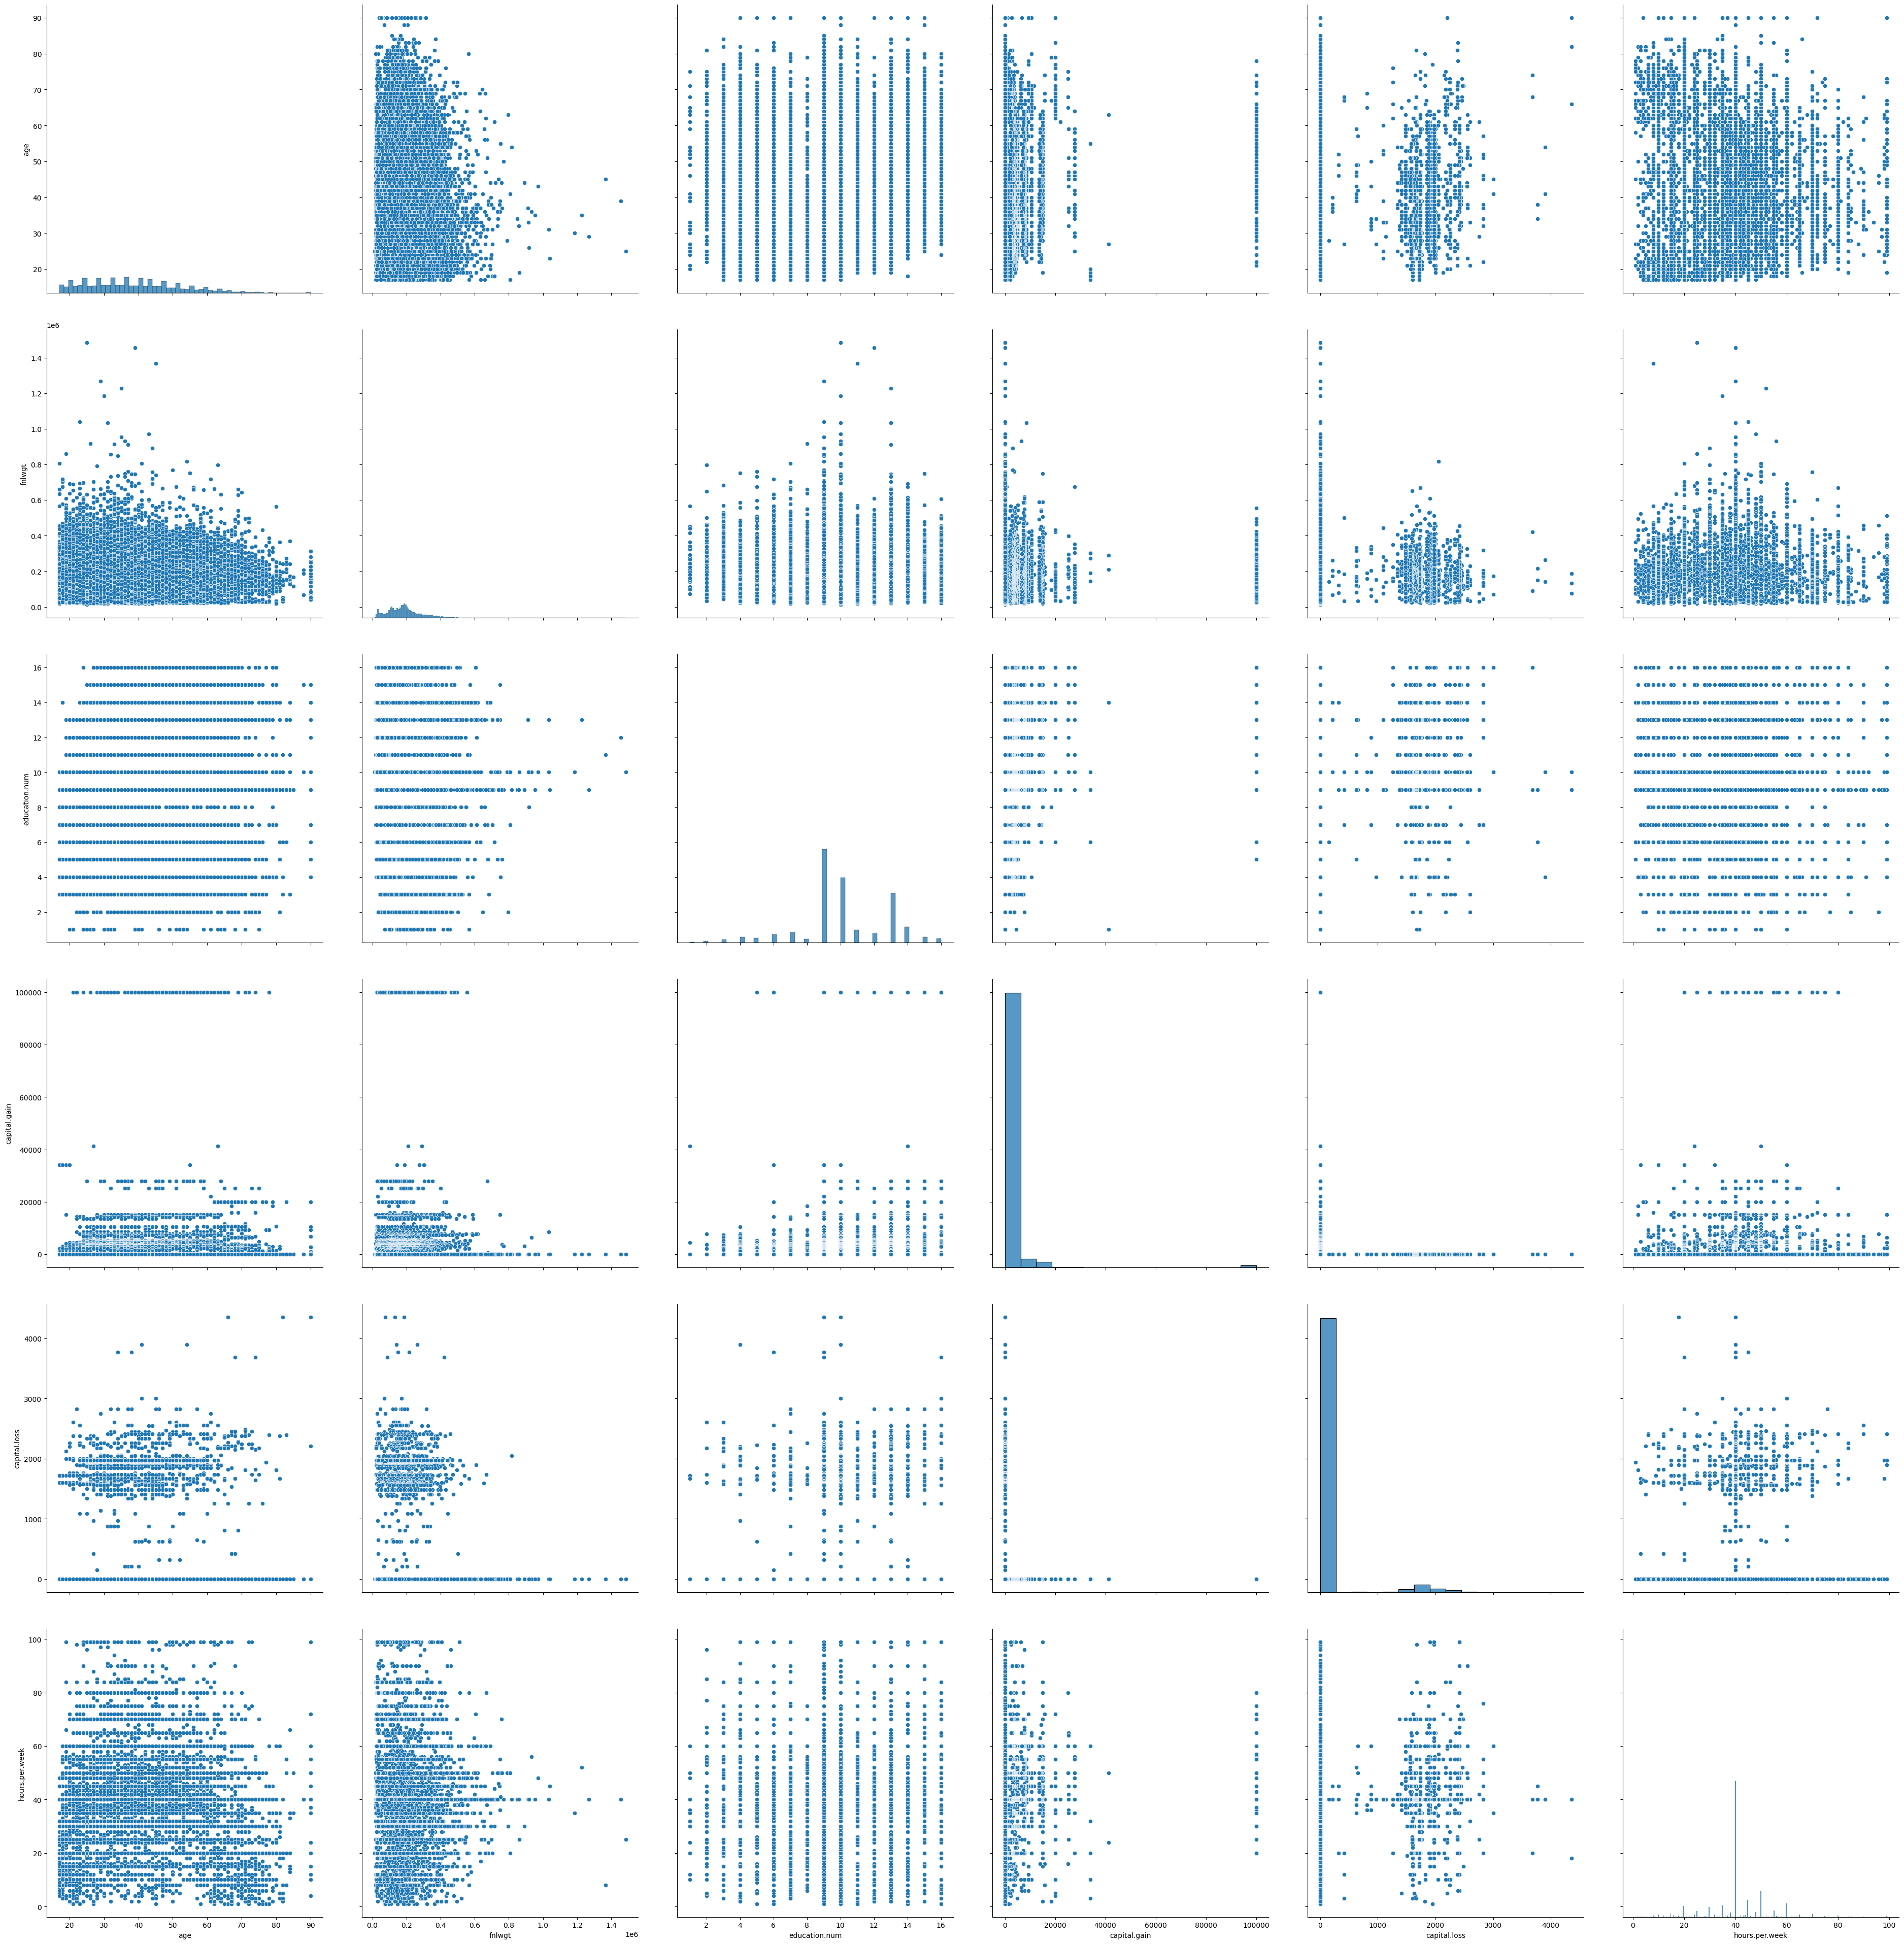

In [ ]:
g = sns.pairplot(df)
g.fig.set_size_inches(40,40)

<Figure size 2000x1000 with 0 Axes>

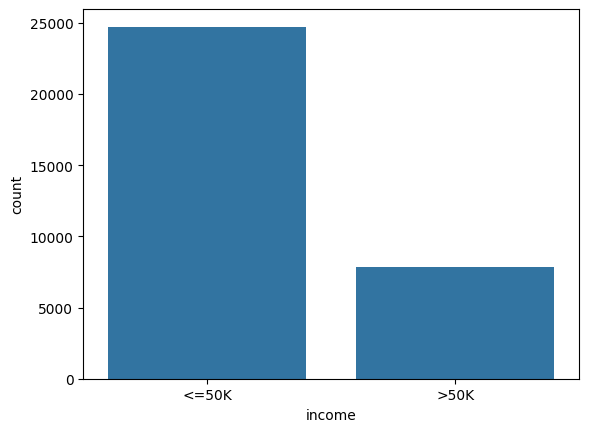

<Figure size 2000x1000 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
sns.countplot(x="income", data=df)
plt.figure(figsize=(20,10))


##### The proportion of records having income less than 50K dollars is more than the proportion of records having more than 50k dollars.#####

<ipython-input-33-93b54d653569>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
<ipython-input-33-93b54d653569>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
<ipython-input-33-93b54d653569>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
<ipython-input-33-93b54d653569>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
<ipython-input-33-93b54d653569>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")


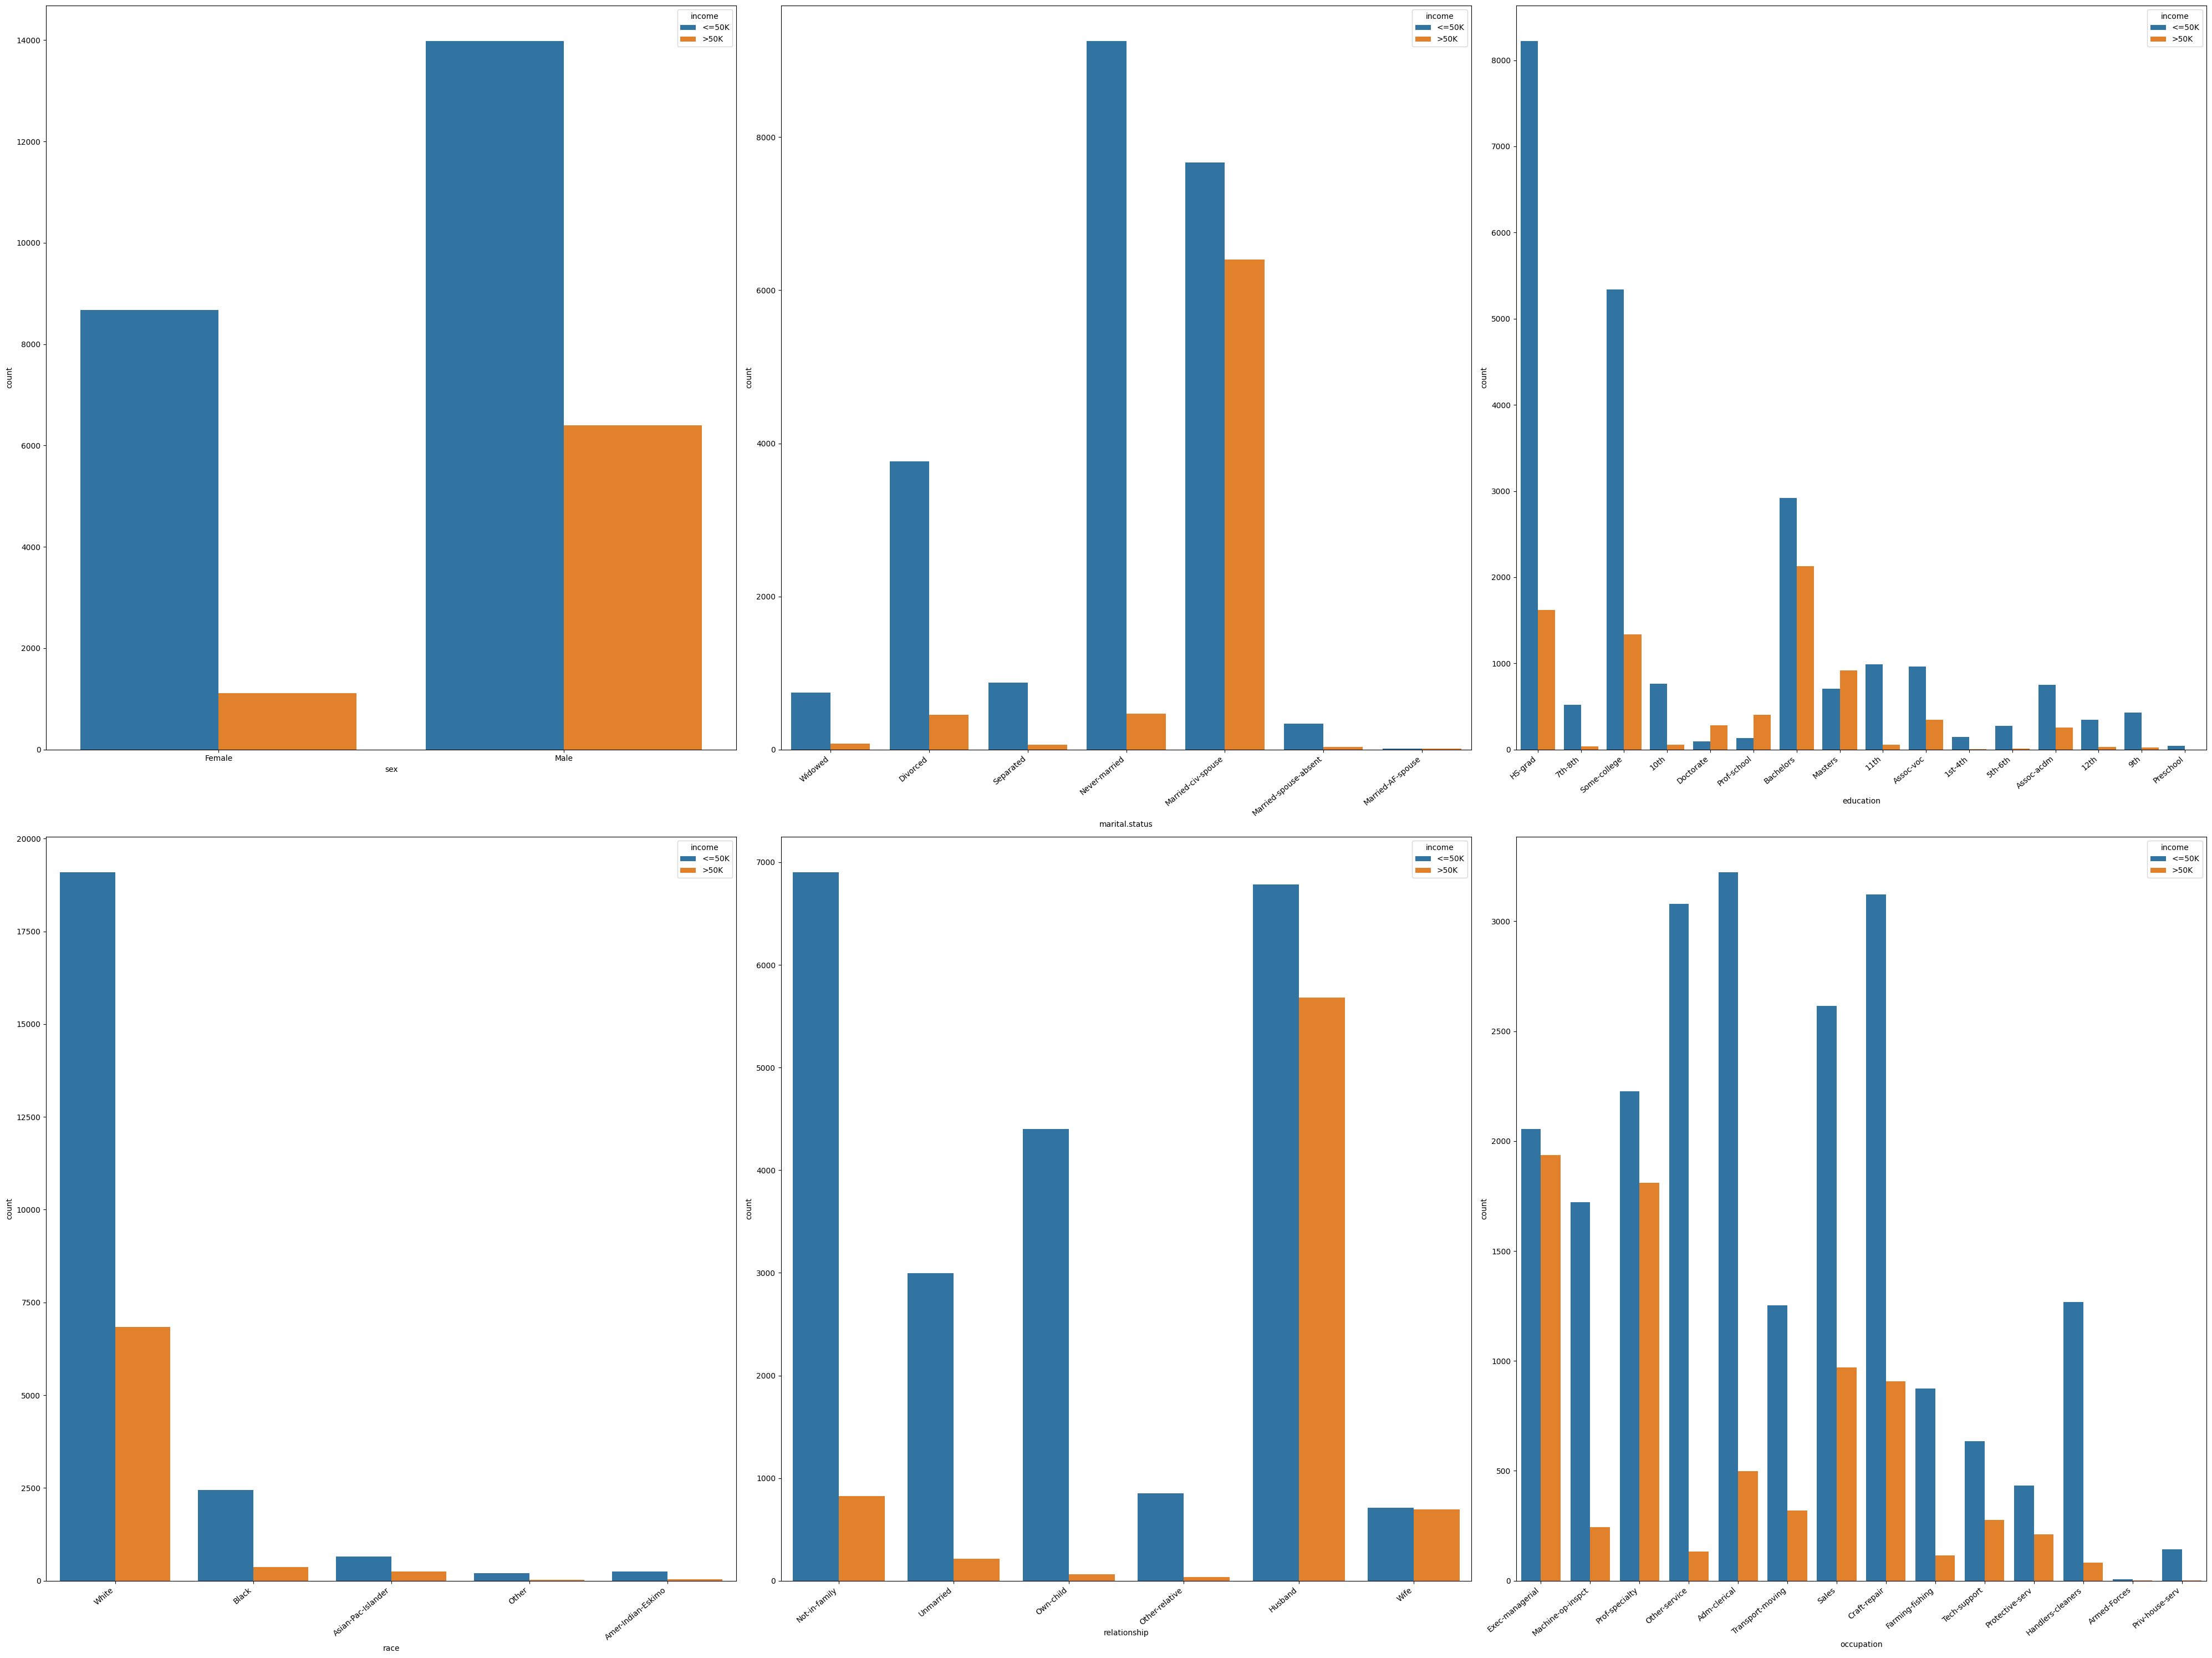

In [33]:
fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(40,30))
sns.countplot(x="sex", data=df1,hue="income",ax = ax[0][0])
cp = sns.countplot(x="marital.status", data=df1,hue="income",ax = ax[0][1])
cp.set_xticklabels(cp.get_xticklabels(), rotation=40, ha="right")
cp2 = sns.countplot(x="education", data=df1,hue="income",ax = ax[0][2])
cp2.set_xticklabels(cp2.get_xticklabels(), rotation=40, ha="right")
cp3 = sns.countplot(x="race", data=df1,hue="income",ax = ax[1][0])
cp3.set_xticklabels(cp3.get_xticklabels(), rotation=40, ha="right")
cp4 = sns.countplot(x="relationship", data=df1,hue="income", ax = ax[1][1])
cp4.set_xticklabels(cp4.get_xticklabels(), rotation=40, ha="right")
cp5 = sns.countplot(x="occupation", data=df1,hue="income",ax= ax[1][2])
cp5.set_xticklabels(cp5.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

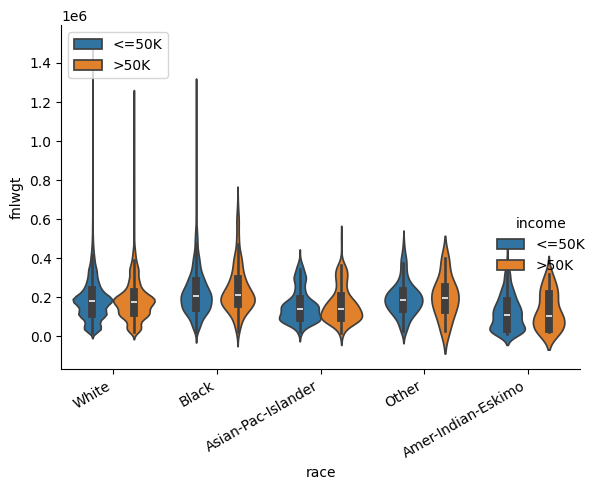

In [34]:
viol_plot = sns.catplot(x="race", y="fnlwgt", hue="income",data=df1, kind="violin")
viol_plot.ax.legend(loc=2)
viol_plot.set_xticklabels(rotation=30,ha = "right")
plt.tight_layout()

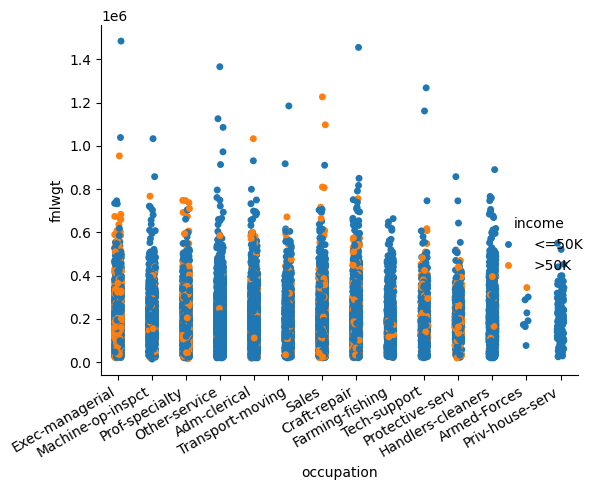

In [35]:
g = sns.catplot(x="occupation", y="fnlwgt", hue="income", data=df1)
g.set_xticklabels(rotation=30,ha = "right")
plt.tight_layout()


age                  Axes(0.125,0.53;0.227941x0.35)
fnlwgt            Axes(0.398529,0.53;0.227941x0.35)
capital.gain      Axes(0.672059,0.53;0.227941x0.35)
capital.loss         Axes(0.125,0.11;0.227941x0.35)
hours.per.week    Axes(0.398529,0.11;0.227941x0.35)
dtype: object

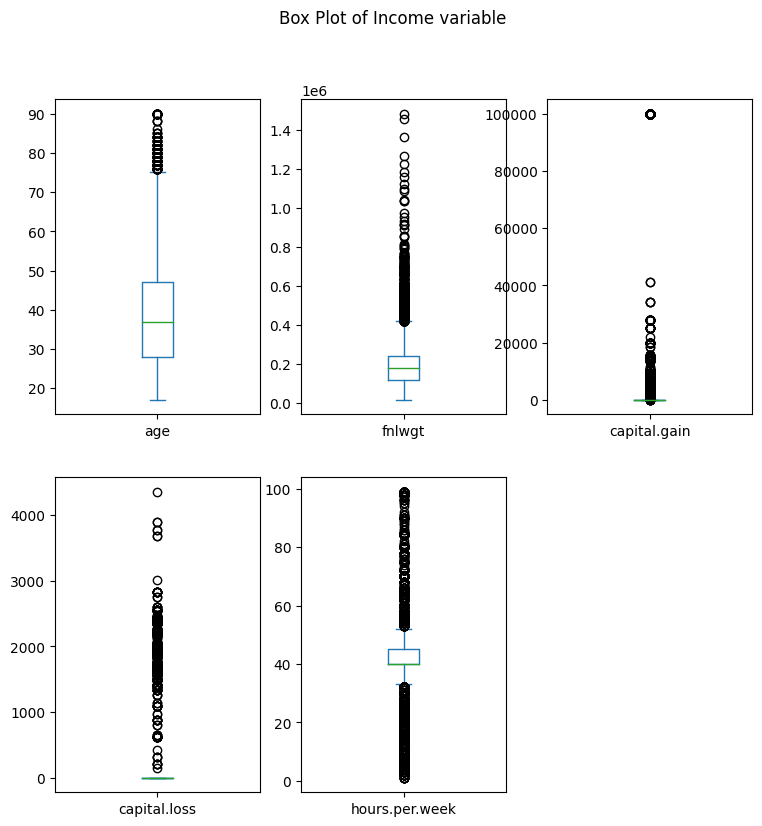

In [36]:
#Box plots

df1.drop(['education.num','income'],axis = 1).plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False,
        figsize=(9,9),title='Box Plot of Income variable')

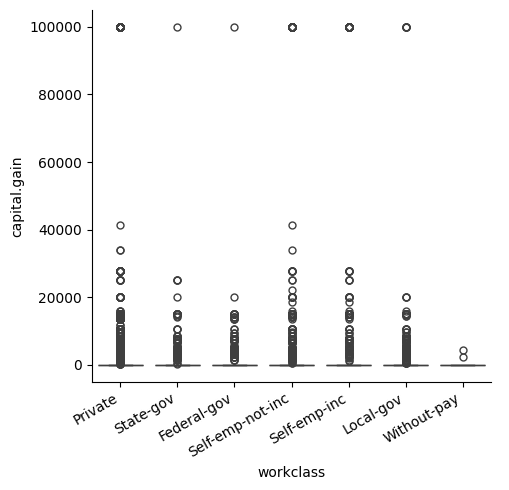

In [37]:
ax = sns.catplot(x="workclass", y="capital.gain", kind="box", data=df1);
ax.set_xticklabels(rotation=30,ha = "right")
plt.tight_layout()

<ipython-input-38-d8d5a99996ef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['age'],kde = False,bins = 30)


<Axes: xlabel='age'>

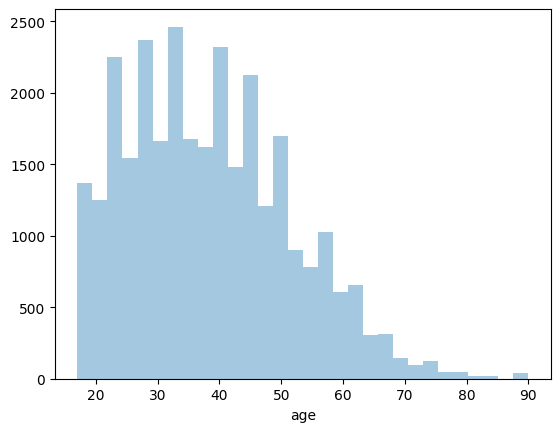

In [38]:
# Distribution Plots:
sns.distplot(df1['age'],kde = False,bins = 30)

(array([4869., 5579., 5761., 5925., 3810., 2412., 1278.,  359.,  114.,
          55.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

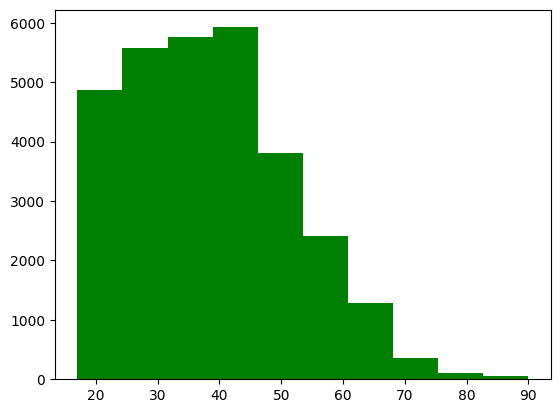

In [39]:
plt.hist(x = df1['age'],histtype='bar',facecolor = 'g')

<ipython-input-40-f30ce9684583>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['education.num'],kde = False)


<Axes: xlabel='education.num'>

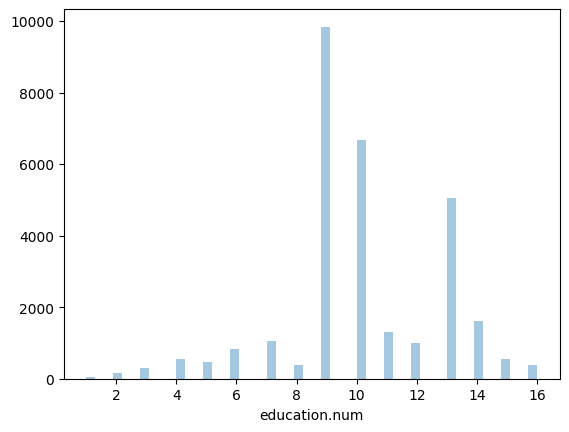

In [40]:
sns.distplot(df1['education.num'],kde = False)

<ipython-input-41-0c8da73472e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['hours.per.week'],kde = False)


<Axes: xlabel='hours.per.week'>

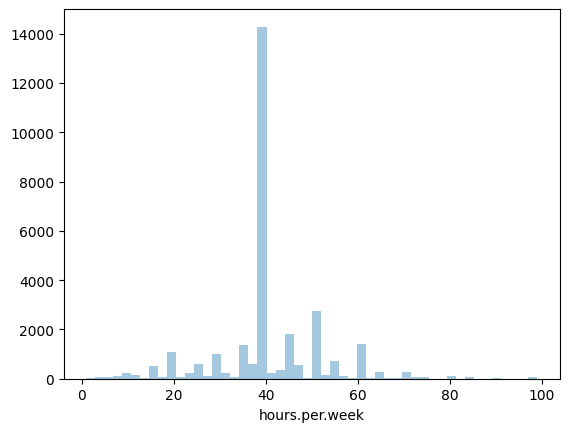

In [41]:
sns.distplot(df1['hours.per.week'],kde = False)

#### The hours.per week value of most of the people is 40  

<Axes: xlabel='capital.gain', ylabel='capital.loss'>

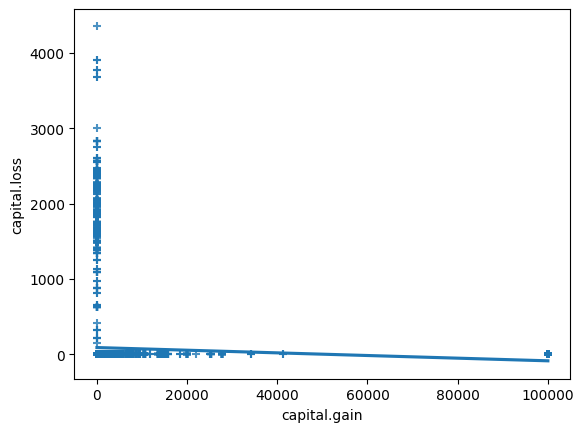

In [43]:

sns.regplot(x='capital.gain', y='capital.loss',data = df1, marker="+")

#### The values of capital.gain and capital.loss are zeroes

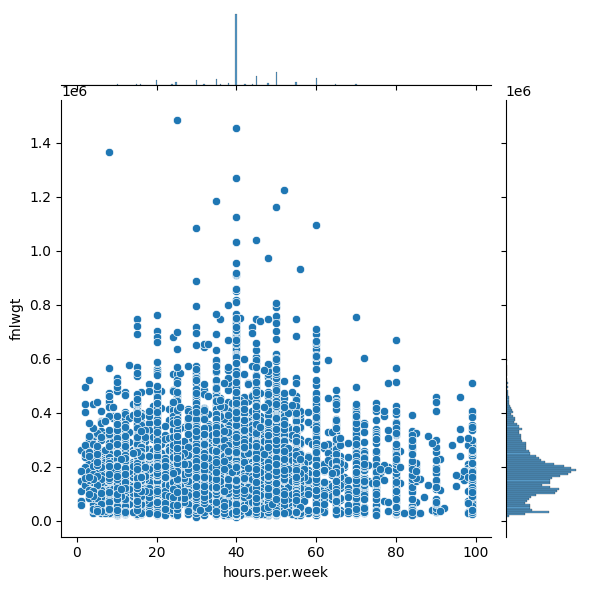

In [44]:
sns.jointplot(x="hours.per.week",y ="fnlwgt",data=df1,kind="scatter")

####  The people having hours.per.week in between 25 to 75 have higher fnlwgt values.

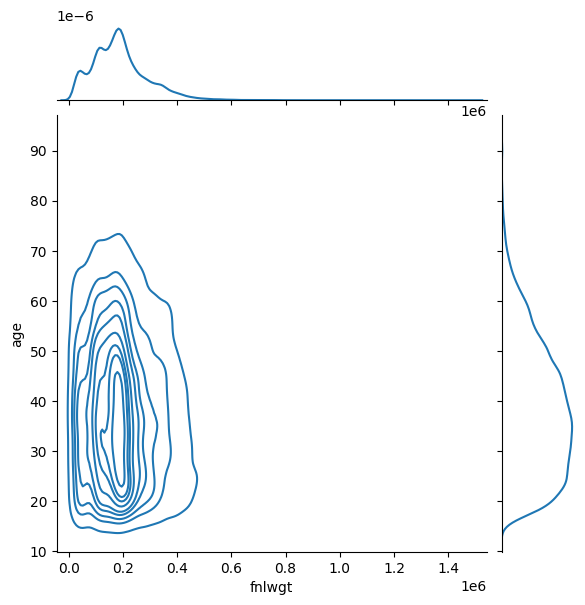

In [45]:
sns.jointplot(x="fnlwgt", y="age", data=df1, kind="kde")

#### The fnlwgt values are moslty in the range of 0-40,000 and are of age 20 to 40.

In [46]:
import pandas as pd
import seaborn as sns
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


### Fucntion to Remove the Outliers

In [47]:
def outL_func(q25,q75):
    return (q75 + 1.5*(q75-q25))

def outR_func(q25,q75):
    return (q25 - 1.5*(q75-q25))

def out_rem(x,outL,outR):
    if x>outR:
        return outR

    elif x<outL:
        return outL
    else :
        return x

In [48]:
import numpy as np

In [49]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [51]:
labels = ['age','fnlwgt','hours.per.week']
for label in labels :
    q25,q75 = q75, q25 = np.percentile(df1[label], [75,25])
    outL = outL_func(q25,q75)
    outR = outR_func(q25,q75)
    df1[label]= df1[label].apply(lambda row: out_rem(row,outL,outR))


### Working on categorical variables


In [52]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


In [53]:
df1['workclass'] = le.fit_transform(df1['workclass'])
df1['education'] = le.fit_transform(df1['education'])
df1['marital.status'] = le.fit_transform(df1['marital.status'])
df1['occupation'] = le.fit_transform(df1['occupation'])
df1['relationship'] = le.fit_transform(df1['relationship'])
df1['race'] = le.fit_transform(df1['race'])
df1['sex'] = le.fit_transform(df1['sex'])
df1['native.country'] = le.fit_transform(df1['native.country'])



In [54]:
# Transforming the target variable to 0s if income is less than 50k and 1 if income is greater than 50k
#df2_income[df2_income['income']=='<=50K'] = -1
#df2_income[df2_income['income']=='>50K'] = 1

df1["income"]= df1["income"].apply(lambda x: 0 if x == '<=50K' else 1  )

In [55]:
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,-0.5,2,-62374.625,11,9,6,3,1,4,0,0,4356,52.5,38,0
3,-0.5,2,-62374.625,5,4,0,6,4,4,0,0,3900,32.5,38,0
4,-0.5,2,-62374.625,15,10,5,9,3,4,0,0,3900,32.5,38,0
5,-0.5,2,-62374.625,11,9,0,7,4,4,0,0,3770,32.5,38,0
6,-0.5,2,-62374.625,0,6,5,0,4,4,1,0,3770,32.5,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.5,2,-62374.625,15,10,4,10,1,4,1,0,0,32.5,38,0
32557,-0.5,2,-62374.625,7,12,2,12,5,4,0,0,0,32.5,38,0
32558,-0.5,2,-62374.625,11,9,2,6,0,4,1,0,0,32.5,38,1
32559,-0.5,2,-62374.625,11,9,6,0,4,4,0,0,0,32.5,38,0


In [56]:
df1['income'].value_counts()

income
0    22654
1     7508
Name: count, dtype: int64

In [57]:
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,-0.5,2,-62374.625,11,9,6,3,1,4,0,0,4356,52.5,38,0
3,-0.5,2,-62374.625,5,4,0,6,4,4,0,0,3900,32.5,38,0
4,-0.5,2,-62374.625,15,10,5,9,3,4,0,0,3900,32.5,38,0
5,-0.5,2,-62374.625,11,9,0,7,4,4,0,0,3770,32.5,38,0
6,-0.5,2,-62374.625,0,6,5,0,4,4,1,0,3770,32.5,38,0


In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   workclass       30162 non-null  int64  
 2   fnlwgt          30162 non-null  float64
 3   education       30162 non-null  int64  
 4   education.num   30162 non-null  int64  
 5   marital.status  30162 non-null  int64  
 6   occupation      30162 non-null  int64  
 7   relationship    30162 non-null  int64  
 8   race            30162 non-null  int64  
 9   sex             30162 non-null  int64  
 10  capital.gain    30162 non-null  int64  
 11  capital.loss    30162 non-null  int64  
 12  hours.per.week  30162 non-null  float64
 13  native.country  30162 non-null  int64  
 14  income          30162 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 3.7 MB


In [60]:
t=df1.income
t=t.values.reshape(-1,1)
t

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [61]:
X=df1[:]
X=X.drop(['income'], axis=1)
X.shape

(30162, 14)

In [62]:
X.shape

(30162, 14)

In [63]:
t.shape

(30162, 1)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.13, random_state=43)

In [67]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.16, random_state=41)

# Define the XGBoost model
model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='multi:softmax',  # Multi-class classification
    num_class=3,  # Number of classes
    booster='gbtree',  # Tree-based boosting
    n_jobs=-1  # Utilize all available cores
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.852051388313303


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
model1 = LogisticRegression().fit(X_train, y_train)

y_predict=model1.predict(X_test)
#pred_model2=model2.predict(X_test)
print("Logistic Regression Score : ",model1.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Score :  0.8010774968918359


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

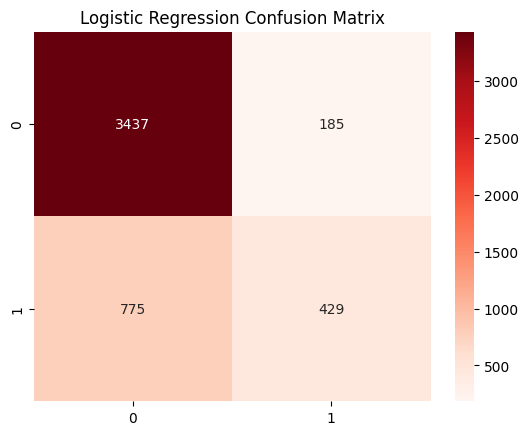

In [71]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
cf=confusion_matrix(y_test, y_predict)
TP=cf[1][1]
TN=cf[0][0]
FN=cf[1][0]
FP=cf[0][1]
sns.heatmap(confusion_matrix(y_test, y_predict),cmap='Reds', annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")

In [72]:
print('Accuracy on test:', accuracy_score(y_test,y_predict),"\n")
print('F1 score on test:', f1_score(y_test,y_predict),"\n")
precision=(TP/(TP+FP))
print("Precision :" , precision,"\n")
specificity=TN/(TN+FP)
print("Specificity :" , specificity,"\n")
recall=TP/(TP+FN)
print("Recall :" , recall,"\n")


Accuracy on test: 0.8010774968918359 

F1 score on test: 0.47194719471947194 

Precision : 0.6986970684039088 

Specificity : 0.9489232468249585 

Recall : 0.35631229235880396 



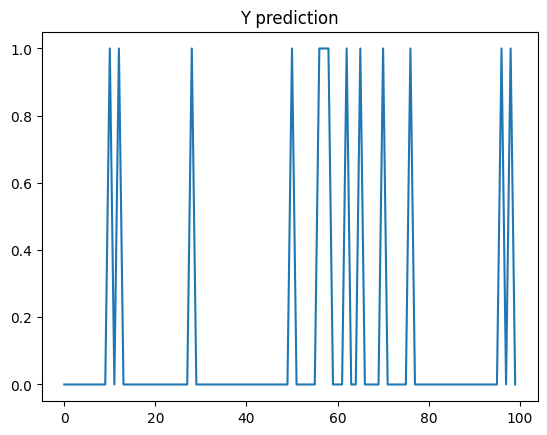

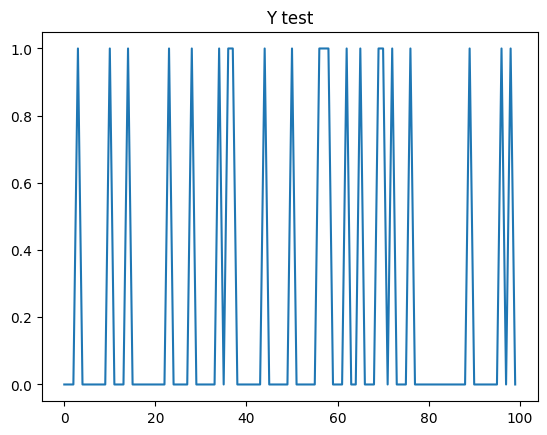

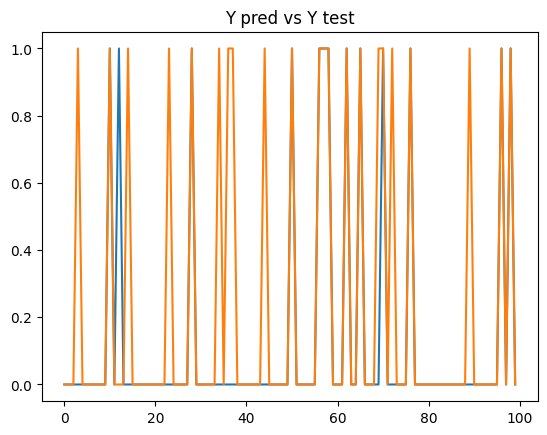

In [73]:
plt.title("Y prediction")
plt.plot(y_predict[0:100])
plt.show()
plt.title("Y test")
plt.plot(y_test[0:100])
plt.show()
plt.title("Y pred vs Y test")
plt.plot(y_predict[0:100])
plt.plot(y_test[0:100])
plt.show()

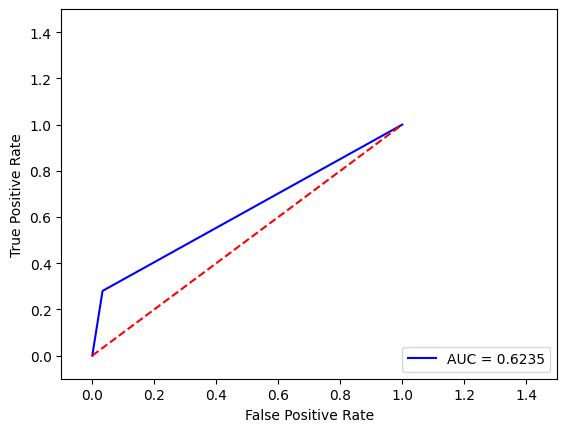

ROC AUC Score :  0.6235043802010654


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("ROC AUC Score : ", roc_auc_score(y_test, y_predict))

### Preliminary Observations


1. The no of records having income less than 50k dollars is more than the no of records having income more than 50k dollars income. The dataset neeeds to be balanced with the target values so that the models do not overfit the data.
2. The capital.gain and capital.loss values contain zeroes ,so these columns can be dropped.<br/>
3. Scatter plots and bar plots are plotted to find the distribution of various values of categorical values.
4. Hours.per.week has a value of 40 in most of the records, so this field can be dropped.
5. The fnlwgt values are moslty in the range of 0-40,000 and are of age 20 to 40.
6. The outliers are present in some of the contiuous variables which need to the handled properly.

## Logistic regression with PCA

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([9.97178360e-01, 2.81934180e-03, 9.03835253e-07, 6.45772144e-07,
       2.83387942e-07, 2.66784329e-07, 8.77764904e-08, 4.66755052e-08,
       3.39145362e-08, 1.56153668e-08, 1.15938216e-08, 2.38864803e-09,
       1.67450792e-37, 0.00000000e+00])

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


## Prediction using CART(classification and Regression Trees)

### Establishing Random Forest Search Classification Model


In [77]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=24)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


<ipython-input-79-c26cde730eef>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [80]:

print("Random Forests accuracy", accuracy_score(y_test, y_pred))

Random Forests accuracy 0.7505180273518441


### Pruning the model to improve the performance

In [81]:

rfc = RandomForestClassifier(n_estimators=100,criterion="gini", max_depth=3)
model_rfc = rfc.fit(X_train,y_train)
pred_rf = rfc.predict(X_test)
Random_Forests_accuracy = accuracy_score(y_test, pred_rf)

<ipython-input-81-ef96fc605a6a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rfc = rfc.fit(X_train,y_train)


In [82]:
print("Random Forests accuracy", accuracy_score(y_test, pred_rf))

Random Forests accuracy 0.7505180273518441


We observe an increase in the accracy score of the model after we had pruned the Random Forest

In [83]:
"""from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
model_dct = rf.fit(X_train,y_train)
pred_dct = rf.predict(X_test)
Decision_Tree_accuracy = accuracy_score(y_test, pred_dct)"""

'from sklearn.tree import DecisionTreeClassifier\ndct = DecisionTreeClassifier()\nmodel_dct = rf.fit(X_train,y_train)\npred_dct = rf.predict(X_test)\nDecision_Tree_accuracy = accuracy_score(y_test, pred_dct)'

In [84]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',random_state=24, max_depth=5)

dtree.fit(X_train, y_train)
tree_pred = dtree.predict(X_test)


In [85]:
print("Decision Tree accuracy: ", accuracy_score(y_test, tree_pred))

Decision Tree accuracy:  0.6610029009531704


Both the Random Forest and Decision Tree return similar prediction accuracy scores. However, Random Forest is marginally better and thus, it is the selected model.

We will now optimize the Random Forest Classifier by tuning the Hyperparameters.



### Hyperparameter Tuning (Fine Tuning of parameters)

The random forest hyperparameters we will tune are the following:

- n_estimators: represents the number of trees in the forest. More trees translates to better learning from the data, however at the cost of performance. Thus, a careful consideration must be placed on what is the optimal value.

- max_features: the number of features to consider before making a split. A high value causes overfitting. Thus, an optimized value must be found.

- min_samples_leaf: the minimum number of samples needed for a node to be considered a leaf node. Increasing this value can cause underfitting.

## Methodology
First we do a Randomized Search to narrow down the possibilites and then perform a Grid Search to further optimize the model. This approach is more suited since directly running a Grid Search is computationally intensive.

### Randomized Search

In [86]:
#Randomized Search

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

n_estimators = np.arange(100, 1000, 100)
max_features = np.arange(1, 10, 1)
min_samples_leaf = np.arange(2, 10, 1)
kfold = KFold(n_splits = 3)
start_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    }

rf = RandomForestClassifier()

test_rf = RandomizedSearchCV(estimator=rf, param_distributions=start_grid, cv=kfold)
print(start_grid)

{'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])}


In [87]:
from sklearn import metrics

In [88]:
test_rf.fit(X_train, y_train)
test_rf.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

{'n_estimators': 200, 'min_samples_leaf': 8, 'max_features': 9}

In [ ]:
test_rf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7271521715106641

In [ ]:
print(test_rf.best_score_)

0.8546396778047386


### Grid Search

In [ ]:
kfold_gs = KFold(n_splits=3)
n_estimators = np.arange(100, 500, 50)
max_features = np.arange(1, 5, 1)
min_samples_leaf = np.arange(2, 5, 1)

gs_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf
}

test_grid = GridSearchCV(estimator = rf, param_grid=gs_grid, cv=kfold_gs)
res = test_grid.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
print(res.best_params_)
print(res.best_score_)

{'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 150}
0.8547817299724918


In [ ]:
res.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7271521715106641

<b>Hence as observed, the accuarcy score of Random search CV has proven to be a better CART algorithm when compared to a Grid Seacrh CV when dealing with large dataset.Model tuning is the process of finding the best machine learning model hyperparameters for a particular data set. Random and Grid Search are two uniformed methods for hyperparameter tuning<b>

### Building the final Model after Hyper parameter tuning the model

In [ ]:
final_model = RandomForestClassifier(n_estimators=450, min_samples_leaf=3, max_features=3, random_state=24)
final_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

In [ ]:
predictions = final_model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7462703061111725


<b> The previous Random Forest Classifier without tuning gave an accuracy score of 0.727. The hyperpaametrized tuned model gives an accuracy score of 0.74005

By fine tuning the model, we are able to get an improvement of 0.0256 or 2.56%</b>

### Ensemble Technique Bagging
<b>Increasing the Accuracy by Applying Ensemble technique BAGGING to our final tuned random forest model</b>

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
ensembled_bag = BaggingClassifier(base_estimator=final_model,n_estimators=450)

In [ ]:
modeled_ensembled_bag =ensembled_bag.fit(X_train,y_train)
pred_ensembled_bag = ensembled_bag.predict(X_test)

In [ ]:
eb=accuracy_score(y_test, pred_ensembled_bag)
print("The Accuracy of BAAGING is ", eb)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(np.arange(0.1, 1, 0.01),f1_score)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')

In [ ]:
#Ensemble Technique (Boosting using Adaboost Classifier)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
Adaboost = AdaBoostClassifier(base_estimator=final_model, n_estimators=15)
model_boost =Adaboost.fit(X_train,y_train)
pred_boost = Adaboost.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Adaboost_cf = accuracy_score(y_test, pred_boost)
print("The Accuracy of BOOSTING is ", Adaboost_cf)

The Accuracy of BOOSTING is  0.7463808155597303


**Hence we can observe an improvement in the accuracy score of the fianl model after we use Ensembled Boosting technique **

In [ ]:
import sklearn.metrics as metrics

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(max(scores)*100,'%')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

74.63808155597303 %


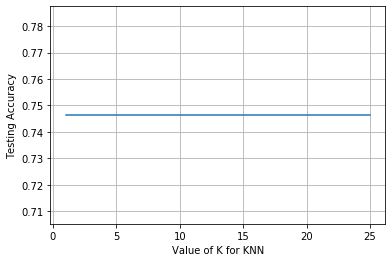

In [ ]:
# plotting the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)